In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [9]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [11]:
Y_train = df["label"]
df = df.drop("label", axis=1)

In [14]:
print(df)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [16]:
print(df.loc[0])

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

2025-04-16 20:34:48.441756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744835688.675462      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744835688.744698      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
tf.keras.backend.clear_session()

In [20]:
#V1

# inputs = keras.Input(shape=(784,))

# x = layers.Dense(64, activation="relu")(inputs)
# x = layers.Dense(32, activation="relu")(x)
# outputs = layers.Dense(16, activation="relu")(x)

# model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

2025-04-16 20:37:05.468710: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
# model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,848 (206.44 KB)

 Trainable params: 52,848 (206.44 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
y_train = Y_train
x_train = df

In [24]:
# model.compile(
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=keras.optimizers.RMSprop(),
#     metrics=[keras.metrics.SparseCategoricalAccuracy()],
# )

# history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.7108 - sparse_categorical_accuracy: 0.1463 - val_loss: 2.5152 - val_sparse_categorical_accuracy: 0.1302
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4147 - sparse_categorical_accuracy: 0.1776 - val_loss: 2.3230 - val_sparse_categorical_accuracy: 0.1849
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3322 - sparse_categorical_accuracy: 0.2130 - val_loss: 2.2239 - val_sparse_categorical_accuracy: 0.2746
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1548 - sparse_categorical_accuracy: 0.2761 - val_loss: 2.1804 - val_sparse_categorical_accuracy: 0.2705
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0870 - sparse_categorical_accuracy: 0.2870 - val_loss: 2.1123 - val_sparse_categorical_accuracy: 0.2952
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0559 - sparse_categorical_accuracy: 0.2984 - val_loss: 2.1867 - val_sparse_categorical_accuracy: 0.3000
Epoc

In [27]:
#test data
x_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [28]:
# predictions = model.predict(x_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [45]:
# predicted_labels = tf.argmax(predictions, axis=1).numpy()
# data = [['ImageId', "Label"]]

# for i in range(len(predicted_labels)):
#     data.append([i + 1, predicted_labels[i]])

In [47]:
# import csv

# file_path = 'output_new.csv'

# with open(file_path, "w", newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(data)

In [56]:
X_train = x_train.to_numpy().reshape(-1, 28, 28, 1)
X_test = x_test.to_numpy().reshape(-1, 28, 28, 1)

In [93]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
print(y_train_cat.shape)

(42000, 10)


In [106]:
#Data Split

from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42
)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_split, y_train_split)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_split, y_val_split)).batch(64)

In [107]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4,4), strides=1, padding="same")(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8,8), padding="same")(A1)
    Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=1, padding="same")(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4,4), padding="same")(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [108]:
model_new = convolutional_model(X_train.shape[1:])
model_new.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model_new.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 8)           │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 28, 28, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 834 (3.26 KB)

 Trainable params: 834 (3.26 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_cat)).batch(64)
history = model_new.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50
)

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2452 - loss: 18.9739 - val_accuracy: 0.4496 - val_loss: 1.9979
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4859 - loss: 1.7807 - val_accuracy: 0.6167 - val_loss: 1.2297
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6446 - loss: 1.1474 - val_accuracy: 0.7189 - val_loss: 0.9030
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7288 - loss: 0.8692 - val_accuracy: 0.7742 - val_loss: 0.7256
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7785 - loss: 0.7065 - val_accuracy: 0.8089 - val_loss: 0.6216
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8139 - loss: 0.5937 - val_accuracy: 0.8323 - val_loss: 0.5354
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8404 - loss: 0.5132 - val_accuracy: 0.8564 - val_loss: 0.4638
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8612 - loss: 0.4512 - val_ac

In [110]:
predictions_new = model_new.predict(X_test)
predicted_labels_new = tf.argmax(predictions_new, axis=1).numpy()

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [111]:
data = [['ImageId', "Label"]]

for i in range(len(predicted_labels_new)):
    data.append([i + 1, predicted_labels_new[i]])

file_path = 'output_newer2.csv'

with open(file_path, "w", newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

/tmp/ipykernel_31/974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_31/974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

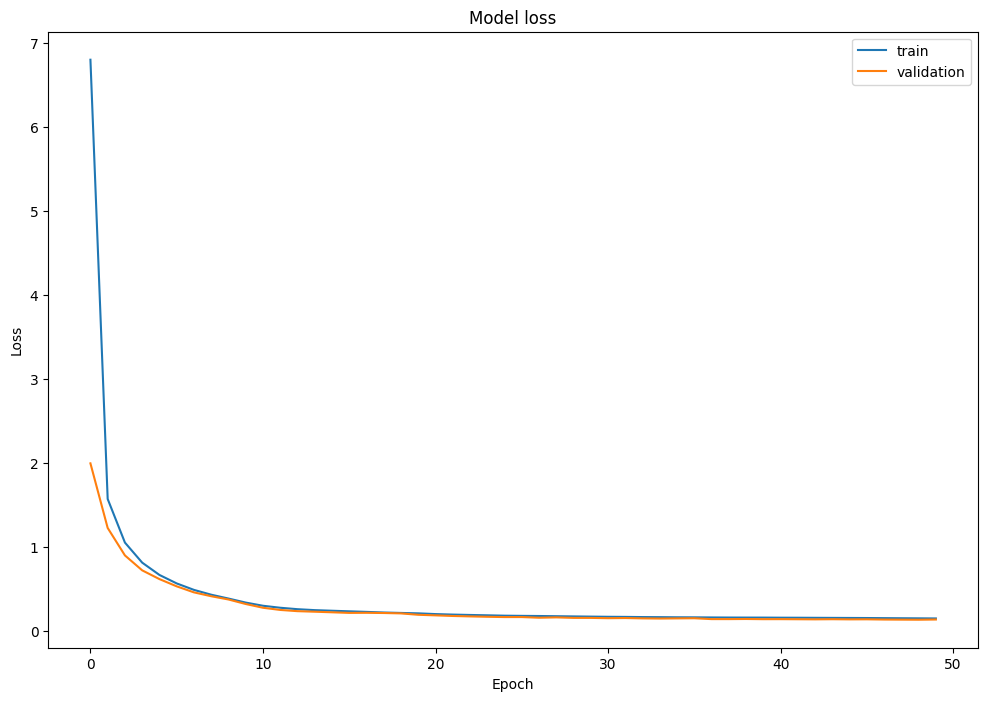

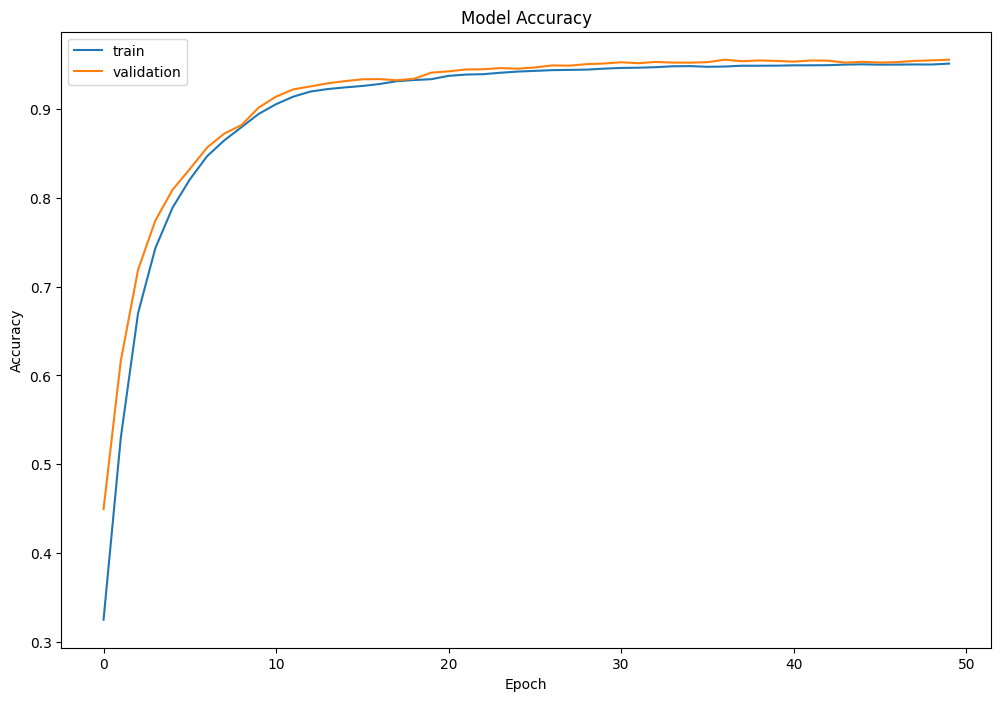

In [112]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')